In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import json file

In [2]:
with open("E:\\denDriver.ai\\main\\algoparams_from_ui json.json",'r') as file:
    # text= file.read()
    text = file.read().replace('\n','')
    iris_dict= json.loads(text)

In [3]:
iris_data_path=iris_dict['design_state_data']['session_info']['dataset']

In [4]:
iris_data=pd.read_csv(iris_data_path)

Target column

In [5]:
target_Type=iris_dict['design_state_data']["target"]['prediction_type']

In [6]:
if target_Type in "Regression":
    print("new data added")
else:
    pass

new data added


In [7]:
def training_data(Traing_split_data):
    if Traing_split_data in 'No sampling(whole data)':
        return "No data split"

# Encoding data for text to int

In [8]:
def encoding_method(data):
    df = data
    enc=OrdinalEncoder()
    for i in df.columns:
        if df[i].dtype == 'object':
            col_name = i
            df[i] = enc.fit_transform(df[[i]])
            encoding = df[i].sort_values().unique()
            globals()[i] = {}
            decoded_data = enc.inverse_transform(df[[i]])
            decoded = sorted(np.unique(decoded_data)) 
            globals()[i] = dict(zip(decoded, encoding))
            return df

# Feature imprtant using some regression alg 

In [9]:
def Regression():
    encoded= encoding_method(iris_data)
    target_column=iris_dict['design_state_data']["target"]['target']
    y=encoded.drop(columns=target_column)
    x=encoded[target_column]
    Traing_split_data=iris_dict['design_state_data']["train"]['sampling_method']
    train = training_data(Traing_split_data)
    return x,y

In [10]:
def Classification():
    F1_Score=iris_dict['design_state_data']["metrics"]['optimize_threshold_for']
    

# Text Data token 

In [35]:

def tokenize_and_hash(text_series, n_features=20):
    vectorizer = HashingVectorizer(n_features=n_features, alternate_sign=False)
    hashed_features = vectorizer.transform(text_series)
    return hashed_features

In [ ]:
# def feature_Handling():
#     column=[i for i in iris_data.columns[0:]]
#     for i in column:
#         feature=iris_dict['design_state_data']["feature_handling"][i]['is_selected']
#         column_name=iris_dict['design_state_data']["feature_handling"][i]['feature_name']
#         if feature in "True":
#             type_csv=iris_data[column_name].dtype.name
#             feature_variable_type=iris_dict['design_state_data']["feature_handling"][i]['feature_variable_type']
#             if (type_csv == "int" or type_csv == "float64") and feature_variable_type == "numerical":
#                 print("Feature_Variable_type: column type is same")
#                 rescaling=iris_dict['design_state_data']["feature_handling"][i]['feature_details']['rescaling']
#                 Impute_with=iris_dict['design_state_data']["feature_handling"][i]['feature_details']['impute_with']
#                 Impute_value=iris_dict['design_state_data']["feature_handling"][i]['feature_details']['impute_value']
#                 if rescaling in "No rescaling":
#                     print(f"Rescaling: {column_name} - This column has no rescaling")
#                 else:
#                     scaler = MinMaxScaler()
#                     iris_data[column_name] = scaler.fit_transform(iris_data[column_name])
#                 if Impute_with == 'Average of values':
#                     average_value = iris_data['column_name'].mean()
#                     value=round(average_value,2)
#                     print(f"Average Value: {value}")
#                 else:
#                     pass
#                 iris_data.fillna(Impute_value, inplace=True)
#                 print(f"Impute_value: Fill the all nan value is {Impute_value}")
#             else:
#                 pass

            
        

some time the hash_columns value is one or one above the column automatically generated in tokenize. im set the limit is 20 column so automatically generated in 20 columns

In [36]:

column=[i for i in iris_data.columns[0:]]
for i in column:
    # print(i)
    feature=iris_dict['design_state_data']["feature_handling"][i]['is_selected']
    # print(feature)
    column_name=iris_dict['design_state_data']["feature_handling"][i]['feature_name']
    # print(column_name)
    if feature == True:
        type_csv=iris_data[column_name].dtype.name
        # print(type_csv)
        feature_variable_type=iris_dict['design_state_data']["feature_handling"][i]['feature_variable_type']
        if (type_csv == "int" or type_csv == "float64") and feature_variable_type == "numerical":
            print("Feature_Variable_type: column type is same")
            rescaling=iris_dict['design_state_data']["feature_handling"][i]['feature_details']['rescaling']
            Impute_with=iris_dict['design_state_data']["feature_handling"][i]['feature_details']['impute_with']
            Impute_value=iris_dict['design_state_data']["feature_handling"][i]['feature_details']['impute_value']
            if rescaling in "No rescaling":
                print(f"Rescaling: {column_name} - This column has no rescaling")
            else:
                scaler = MinMaxScaler()
                iris_data[column_name] = scaler.fit_transform(iris_data[column_name])
            if Impute_with == 'Average of values':
                average_value = iris_data[column_name].mean()
                value=round(average_value,2)
                print(f"Average Value: {value}")
            else:
                pass
            iris_data.fillna(Impute_value, inplace=True)
            print(f"Impute_value: Fill the all nan value is {Impute_value}")
        else:
            if (type_csv == "object") and feature_variable_type == "text":
                
                text_handling=iris_dict['design_state_data']["feature_handling"]['species']['feature_details']['text_handling']
                hash_columns=iris_dict['design_state_data']["feature_handling"]['species']['feature_details']['hash_columns']
                
                if text_handling == 'Tokenize and hash':
                    hashed_features = tokenize_and_hash(iris_data[column_name])
                    hashed_df = pd.DataFrame(hashed_features.toarray())
                    print(hashed_df)
                    if hash_columns == 0:
                        iris_new_data = pd.concat([iris_data, hashed_df], axis=1)
                        print(iris_new_data)
                    else:
                        iris_new_data = pd.concat([iris_data, hashed_df.iloc[:, :hash_columns]], axis=1)
                        print(iris_new_data)

Feature_Variable_type: column type is same
Rescaling: sepal_length - This column has no rescaling
Average Value: 5.84
Impute_value: Fill the all nan value is 0
Feature_Variable_type: column type is same
Rescaling: sepal_width - This column has no rescaling
Impute_value: Fill the all nan value is -1
Feature_Variable_type: column type is same
Rescaling: petal_length - This column has no rescaling
Average Value: 3.76
Impute_value: Fill the all nan value is 0
Feature_Variable_type: column type is same
Rescaling: petal_width - This column has no rescaling
Impute_value: Fill the all nan value is -2


this is number 3 question im create the json for question formet 

In [38]:
feature_reduction=iris_dict['design_state_data']["feature_reduction"]
feature_reduction

{'feature_reduction_method': 'Correlation with target',
 'No Reduction': {'is_selected': True, 'num_of_features_to_keep': 5},
 'Correlation with target': {'is_selected': True,
  'num_of_features_to_keep': 0},
 'Tree-based': {'is_selected': False,
  'num_of_features_to_keep': 0,
  'depth_of_trees': 0,
  'num_of_trees': 0},
 'Principal Component Analysis': {'is_selected': False,
  'num_of_features_to_keep': 0}}

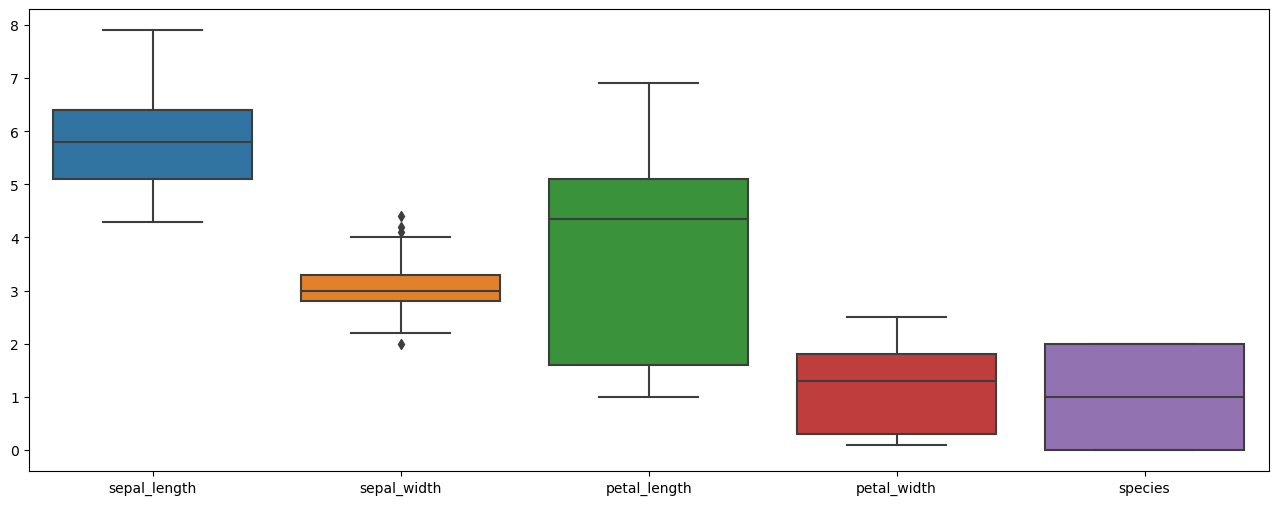

In [39]:
plt.figure(figsize=(16,6))
sns.boxplot(iris_data)
plt.show()

some time the value are changes automatically no_reducation and correlation in target value and tree based value is automatically change the output 

In [40]:
key =feature_reduction.keys()
results = {}

for i in key:
    if i == "No Reduction":
        if feature_reduction['No Reduction']['is_selected']:
            num_to_keep = feature_reduction['No Reduction']['num_of_features_to_keep']
            results['No Reduction'] = iris_data.iloc[:, :num_to_keep]
        else:
            results['No Reduction'] = "No Reduction"
    
    elif i == "Correlation with target":
        if feature_reduction['Correlation with target']['is_selected']:
            num_to_keep = feature_reduction['Correlation with target']['num_of_features_to_keep']
            selected_features = iris_data.columns[:num_to_keep]
            selected_data = iris_data[selected_features]
            print(selected_data)
            try:
                plt.figure(figsize=(10, 8))
                sns.heatmap(selected_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
                plt.show()
            except:
                print("num_of_features_to_keep is zero")
            results['Correlation with target'] = selected_data
        else:
            results['Correlation with target'] = "No Correlation with the target"
    
    elif i == "Tree-based":
        if feature_reduction["Tree-based"]['is_selected'] == True:
            clf = RandomForestRegressor(max_depth=feature_reduction["Tree-based"]['depth_of_trees'],
                                        n_estimators=feature_reduction["Tree-based"]['num_of_trees'])
            Traing_data=Regression()
            y=Traing_data[0]
            x=Traing_data[1]
            clf.fit(x,y)
            feature_importances = clf.feature_importances_
            print(feature_importances)
            num_features_to_keep = feature_reduction["Tree-based"]['num_of_features_to_keep']
            selected_features_indices = feature_importances.argsort()[::-1][:num_features_to_keep]
            selected_features = iris_data.columns[selected_features_indices]
            print(selected_features) 
            results['Tree-based'] = (feature_importances, selected_features)
        else:
            results['Tree-based'] = "No Correlation with the target"
    
    elif i == "Principal Component Analysis":
        if feature_reduction["Principal Component Analysis"]['is_selected']:
            results['Principal Component Analysis'] = iris_data
        else:
            results['Principal Component Analysis'] = iris_data
    
    else:
        print(f"Unknown feature reduction method: {i}")
    
print(results)



Unknown feature reduction method: feature_reduction_method
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[150 rows x 0 columns]
num_of_features_to_keep is zero
{'No Reduction':      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...     

<Figure size 1000x800 with 0 Axes>

In [19]:
for key, value in results.items():
    print(f"{key}: {value}")

# If the 'No Reduction' method is selected, you can access the reduced data like this:
if feature_reduction['No Reduction']['is_selected']:
    reduced_data = results['No Reduction']
    reduced_data

No Reduction:      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Correlation with target: Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4

check the output valuess

In [19]:
# def perform_feature_reduction(data, feature_reduction):
#     # key =feature_reduction.keys()
#     key=['No Reduction', 'Correlation with target', 'Tree-based', 'Principal Component Analysis']
#     for  i in key:
#         if i == "No Reduction":
#             if feature_reduction['No Reduction']['is_selected'] == True:
#                 num_to_keep = feature_reduction['No Reduction']['num_of_features_to_keep']
#                 return data.iloc[:, :num_to_keep]
#             else:
#                 return "No Reduction"
            
#         elif i == "Correlation with target":
#             if feature_reduction['Correlation with target']['is_selected'] == True:
#                 num_to_keep = feature_reduction['Correlation with target']['num_of_features_to_keep']
#                 selected_features=data.iloc[:, :num_to_keep].columns
#                 selected_data = iris_data[selected_features]
#                 # selected_data
#                 try:
#                     plt.figure(figsize=(10,8))
#                     sns.heatmap(selected_data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
#                     selected_features
#                 except:
#                     pass
#                 return selected_data
#             else:
#                 return "no Correlation with the target "
        
#         elif i == "Tree-based":
#             if feature_reduction["Tree-based"]['is_selected'] == True:
#                 clf = RandomForestRegressor(max_depth=feature_reduction["Tree-based"]['depth_of_trees'],
#                                             n_estimators=feature_reduction["Tree-based"]['num_of_trees'])
#                 Traing_data=Regression()
#                 y=Traing_data[0]
#                 x=Traing_data[1]
#                 clf.fit(x,y)
#                 feature_importances = clf.feature_importances_
#                 print(feature_importances)
#                 num_features_to_keep = feature_reduction["Tree-based"]['num_of_features_to_keep']
#                 selected_features_indices = feature_importances.argsort()[::-1][:num_features_to_keep]
#                 selected_features = data.columns[selected_features_indices]
#                 return feature_importances,selected_features 
#             else:
#                 return "no Correlation with the target "
        
#         elif i == "Principal Component Analysis":
#             if feature_reduction["Principal Component Analysis"]['is_selected'] == True:
#                 return data
#             else:
#                 return data
        
#         else:
#             print(f"Unknown feature reduction method: {i}")
#             return data


#     # reduced_data = perform_feature_reduction(iris_data, feature_reduction)

#     # print(reduced_data)
